In [1]:
import random as rn
import numpy as np
import matplotlib.pyplot as plt

In [14]:
T = 1
N = 500
dt = T/N
dW = np.zeros(N)
W = np.zeros(N)
rng = np.random.default_rng(42)

In [15]:
randn = rng.standard_normal(N)

In [16]:
dW = np.sqrt(dt)*randn

In [17]:
len(dW)

500

In [18]:
W = np.cumsum(dW)
W=np.insert(W,0,0)

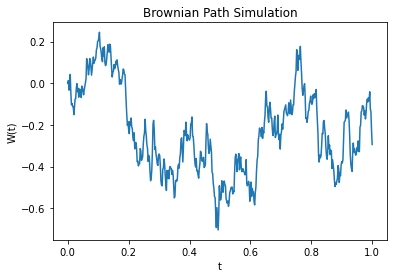

In [19]:
x = np.arange(0,T+dt,dt)
# corresponding y axis values
y = W
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('t')
# naming the y axis
plt.ylabel('W(t)')
  
# giving a title to my graph
plt.title('Brownian Path Simulation')
  
# function to show the plot
plt.show()

In [8]:
rand2 = rng.standard_normal(N)

In [9]:
dW = np.sqrt(dt)*rand2


In [10]:
for i in range(1,N):
    W = np.zeros(N+1)
    W[i] = dW[i] + W[i-1]

In [11]:
W = np.cumsum(dW)
W=np.insert(W,0,0)

In [12]:
len(W)

501

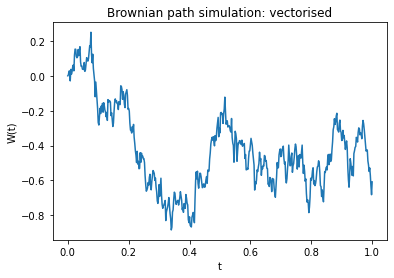

In [13]:
x = np.arange(0,T+dt,dt)
y = W
plt.plot(x,y)
plt.xlabel('t')
plt.ylabel('W(t)')
plt.title('Brownian path simulation: vectorised')
plt.show()


In [14]:
T = 1
N = 500
dt = T/N
t = np.arange(0,T+dt,dt)
M = 1000

In [15]:
dW1 = np.sqrt(dt)*np.random.randn(M,N)
dW2 = np.sqrt(dt)*np.random.randn(5,N)

In [16]:
W2 = np.cumsum(dW2, axis = 1)
W2=np.c_[np.zeros(5),W2]
W = np.cumsum(dW1, axis = 1)
W=np.c_[np.zeros(M),W]

In [17]:
W

array([[ 0.        ,  0.01566456,  0.1065685 , ...,  0.89793964,
         0.7959945 ,  0.76748248],
       [ 0.        , -0.05643174, -0.04402884, ..., -0.34573417,
        -0.38032964, -0.41535743],
       [ 0.        , -0.0132659 ,  0.04436896, ..., -2.4567116 ,
        -2.44735306, -2.46754443],
       ...,
       [ 0.        ,  0.09190356,  0.10176811, ...,  1.12865773,
         1.11596854,  1.0954443 ],
       [ 0.        ,  0.05747691,  0.06505554, ...,  0.99033689,
         0.9348644 ,  0.94266283],
       [ 0.        , -0.02670639, -0.01847966, ..., -0.23744634,
        -0.30641858, -0.42554104]])

In [18]:
U = np.exp(np.tile(t,(M,1)) + 0.5 * W)
U2 = np.exp(np.tile(t,(5,1)) + 0.5 * W2)

In [19]:
Umean = U.mean(0)


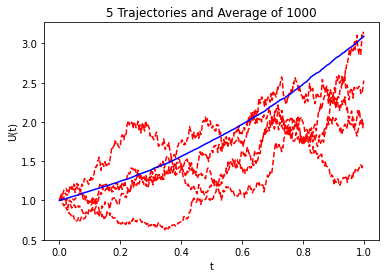

In [20]:

plt.plot(t,U2.T,'r--')
plt.plot(t,Umean,'b-')
plt.xlabel('t')
plt.ylabel('U(t)')
plt.title('5 Trajectories and Average of 1000')
plt.show()

In [21]:
rand = rng.standard_normal((1,500))
T = 1
N = 500
dt = T/N

In [22]:
dW = np.sqrt(dt)*rand
W = np.cumsum(dW)

In [23]:
#shifted_W = np.roll(W, 1)
#shifted_W[0] = 0
#shifted_rand = np.roll(rand, 1)
#shifted_rand[0] = 0

In [24]:
ito = np.sum(W*dW)
ito

0.5047060921547154

In [25]:
strat = np.sum(((0.5*((W*dW) + W) + 0.5*np.sqrt(dt)*(rand))*dW))
strat

0.9156332952666627

In [26]:
itoerr = abs(ito - 0.5*W[-1]**(2-T))
print(itoerr)
straterr = abs(strat - 0.5*W[-1]**2)
print(straterr)

0.3919084446860403
0.8901866767177277


In [27]:
lam = 2
mu = 1
X0 = 1
T = 1
N = 2**8
dt = 1/N
rand = rng.standard_normal(N)


In [28]:
dW = np.sqrt(dt)*rand
W = np.cumsum(dW)

In [29]:
Xtrue = X0*np.exp((lam - 0.5*(mu**2))*(np.arange(dt, T + dt, dt) + mu*W))

Text(0, 0.5, 'X')

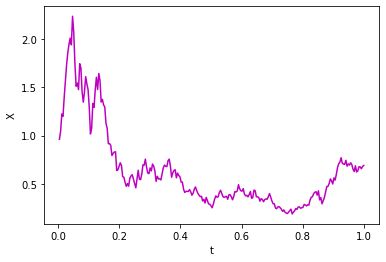

In [30]:
plt.plot(np.arange(dt, T + dt, dt),Xtrue,'m-')
plt.xlabel('t')
plt.ylabel('X')


In [31]:
R = 4
Dt = R*dt
L = 1/Dt
L

64.0

In [32]:
Xem = np.zeros(int(L))
Xtemp = X0
len(Xem)

64

In [33]:
for j in range(1,int(L)):
    Winc = np.sum(dW[R*(j-1):R*j])
    Xtemp = Xtemp + Dt*lam*Xtemp + mu*Xtemp*Winc
    Xem[j] = Xtemp

In [34]:
len(Xem)
len(np.arange(0,T,dt))
print(abs(Xem[-1] - Xtrue[-1]))

0.6020335162699874


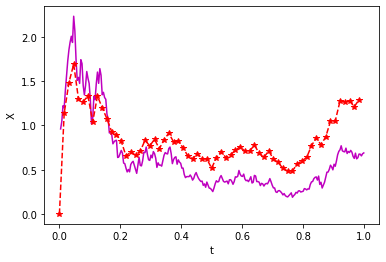

In [35]:
plt.plot(np.arange(dt, T + dt, dt),Xtrue,'m-')
plt.xlabel('t')
plt.ylabel('X')

plt.plot(np.arange(0,T ,Dt),Xem, 'r--*')

In [36]:
lam = 2
mu = 1
X0 = 1
T = 1
N = 2**9
dt = T/N
M = 500

In [37]:
Xerr = np.zeros((M,5))
Winc = 0

In [38]:
Xerr = np.zeros((M, 5))

for s in range(M):
    dW = np.sqrt(dt) * np.random.randn(1, N)
    W = np.cumsum(dW)
    Xtrue = X0 * np.exp((lam - 0.5 * mu**2) + mu * W[-1])

    for p in range(1, 6):
        R = 2 ** (p - 1)
        Dt = R * dt
        L = N // R
        Xtemp = X0

        for j in range(L):
            Winc = np.sum(dW[:, R * (j ) + 1:R * (j+1)])
            Xtemp = Xtemp + Dt * lam * Xtemp + mu * Xtemp * Winc

        Xerr[s, p - 1] = abs(Xtemp - Xtrue)

In [39]:
Dtvals = dt * (2 ** np.arange(4,-1,-1))
Dtvals

array([0.03125   , 0.015625  , 0.0078125 , 0.00390625, 0.00195312])

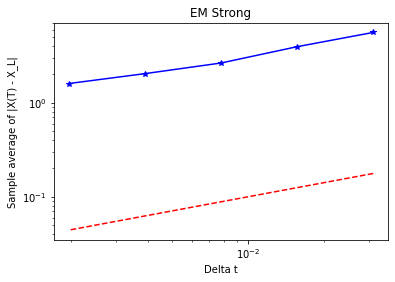

In [40]:
plt.loglog(Dtvals, Xerr.mean(0),'b*-')
plt.loglog(Dtvals,(Dtvals**0.5),'r--')
plt.xlabel('Delta t')  # Replace 'Your X-axis Label Here' with your actual label
plt.ylabel('Sample average of |X(T) - X_L|')  # Replace 'Your Y-axis Label Here' with your actual label

# Optional: Add a title and a legend to the plot
plt.title('EM Strong')  # Replace 'Your Plot Title Here' with your actual title
# Show plot
plt.show()

In [41]:
import numpy as np

# Assuming Dtvals and Xerr are already defined
A = np.hstack([np.ones((5,1)), np.log(Dtvals).reshape(-1,1)])
rhs = np.log(np.mean(Xerr, axis=0)).reshape(-1,1)  # Modify axis if needed
sol = np.linalg.lstsq(A, rhs, rcond=None)[0]  # Solves the least squares problem
q = sol[1]  # Python indexing is 0-based
resid = np.linalg.norm(A @ sol - rhs)  # Calculates the Euclidean norm of the residual

print(q)
print(resid)

[0.45606537]
0.10350792980986158


In [42]:
lam = 2
mu = 0.1
X0 = 1
T = 1
M = 500
rand = rng.standard_normal((M,1))

In [43]:
Xem = np.zeros(6)

In [46]:
rand = rng.standard_normal((M, int(L)))  
for p in range(1, 6):
    Dt = 2 ** (p - 10)
    L = T / Dt
     
    Xtemp = X0 * np.ones((M, 1))
    
    for j in range(int(L-1)):
        Winc = np.sqrt(Dt) * rand[:, j]
        Xtemp = Xtemp + Dt * lam * Xtemp + mu * Xtemp * Winc
    
    Xem[p-1] = np.mean(Xtemp)

Xerr = abs(Xem - np.exp(lam))

In [47]:
Dtvals = 2 ** (np.arange(1, 6, dtype = float) - 10)
Dtvals

array([0.00195312, 0.00390625, 0.0078125 , 0.015625  , 0.03125   ])

In [48]:
Xerr = Xerr[:-1]


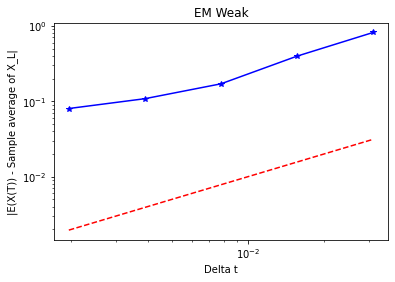

In [49]:
plt.loglog(Dtvals,(Xerr),"b*-")
plt.loglog(Dtvals,Dtvals,'r--')
plt.xlabel('Delta t')  # Replace 'Your X-axis Label Here' with your actual label
plt.ylabel('|E(X(T)) - Sample average of X_L|')  # Replace 'Your Y-axis Label Here' with your actual label

# Optional: Add a title and a legend to the plot
plt.title('EM Weak')  # Replace 'Your Plot Title Here' with your actual title
# Show plot
plt.show()

In [50]:
r = 2
K = 1
beta = 0.25
X0 = 0.5
T = 1
N = 2**11
dt = T/N
M = 500
R = [1,8,16,32,64,128]
rand = rng.standard_normal((M,N))

In [51]:
dW = np.sqrt(dt)*rand
Xmil = np.zeros((M,6))

In [52]:
result_data = []

for p in range(6):
    Dt = R[p] * dt
    L = N // R[p]

    Winc_data = np.zeros((M, L))  
    Xtemp = X0 * np.ones((M))

    for j in range(L):
        start_index = R[p] * j
        end_index = R[p] * (j + 1)
        subarray = dW[:, start_index:end_index]
        Winc = np.sum(subarray, axis=1)
        Winc_data[:, j] = Winc

        Xtemp = Xtemp + Dt * r * Xtemp * (K - Xtemp) + beta * Xtemp * Winc + 0.5 * (beta ** 2) * Xtemp * (Winc ** 2 - Dt)

    result_data.append(Winc_data)

    Xmil[:, p] = Xtemp

In [53]:
Xref = Xmil[:,0]
Xerr = np.abs(Xmil[:, 1:] - Xref.reshape(-1, 1))
mean_Xerr = np.mean(Xerr, axis=0)
R = [int(r) for r in R]
Dtvals = [dt * r for r in R[1:]]

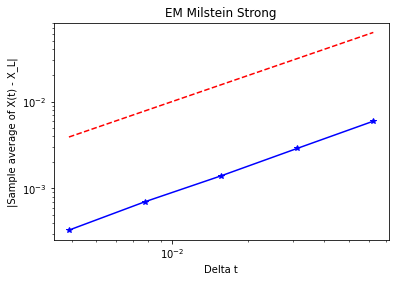

In [54]:
plt.loglog(Dtvals, mean_Xerr,'b*-')
plt.loglog(Dtvals, Dtvals, 'r--')
plt.xlabel('Delta t')  # Replace 'Your X-axis Label Here' with your actual label
plt.ylabel('|Sample average of X(t) - X_L|')  # Replace 'Your Y-axis Label Here' with your actual label

# Optional: Add a title and a legend to the plot
plt.title('EM Milstein Strong')  # Replace 'Your Plot Title Here' with your actual title
# Show plot
plt.show()

In [62]:
import numpy as np

# Example initialization, replace with your actual data
# Dtvals = np.array([...])
# Xerr = np.array([...])

# Make sure the number of rows in `np.ones` matches the length of `Dtvals`
n = len(Dtvals)  # Ensuring the length matches the data
A = np.hstack([np.ones((n, 1)), np.log(Dtvals).reshape(-1, 1)])
rhs = np.log(mean_Xerr).reshape(-1, 1)  # Ensuring rhs is correctly shaped

# Attempt solving the linear system
sol, residuals, rank, s = np.linalg.lstsq(A, rhs, rcond=None)

# Extracting the solution
q = sol[1]

# If you specifically want the norm of the residuals as a single value
if residuals.size > 0:  # If residuals were computed
    resid_norm = np.sqrt(residuals[0])
else:
    # Compute manually if no residuals returned (e.g., underdetermined system)
    resid_norm = np.linalg.norm(np.dot(A, sol) - rhs)

print("Solution:", sol)
print("Q value:", q)
print("Residual norm:", resid_norm)


Solution: [[-2.25064594]
 [ 1.03718939]]
Q value: [1.03718939]
Residual norm: 0.02728375450641057


In [16]:
T = 20
M = 50000
X0 = 1
lam = -3
mu = np.sqrt(3)
rand = rng.standard_normal((M,1))
ltype = ['b-', 'r--', 'm-.']

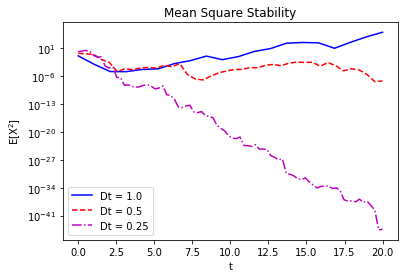

In [17]:
for k in range(1,4):
    Dt = 2 ** (1 - k)
    N = int(T // Dt)
    Xms = np.zeros(N)
    Xtemp = X0 * np.ones(M)
    for j in range(N):
        Winc = np.sqrt(Dt) * rand[j]
        Xtemp = Xtemp + (Dt * lam * Xtemp) + (mu * Xtemp * Winc)
        Xms[j] = np.mean(Xtemp ** 2)
    
    x_values = np.linspace(0, T, N)
    plt.semilogy(x_values, Xms, ltype[k-1], label=f'Dt = {1/2**(k-1)}')
plt.xlabel('t')
plt.ylabel('E[X$^2$]')
plt.title('Mean Square Stability')
plt.legend()

# Show the plot
plt.show()

In [19]:
T = 500
lam = 0.5
mu = np.sqrt(6)    

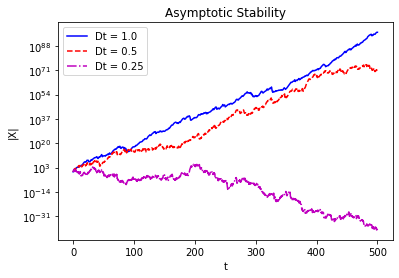

In [20]:
for k in range(1, 4):
    Dt = 2 ** (1 - k)
    N = int(T / Dt)
    Xemabs = np.zeros(N)
    Xtemp = X0
    
    for j in range(N):
        Winc = np.sqrt(Dt) * rand[j]  # Assuming rand is pre-defined
        Xtemp = Xtemp + Dt * lam * Xtemp + mu * Xtemp * Winc
        Xemabs[j] = abs(Xtemp)
    
    plt.semilogy(np.arange(0, T + Dt, Dt), [X0] + list(Xemabs), ltype[k-1], label=f'Dt = {1/2**(k-1)}')
    
plt.xlabel('t')
plt.ylabel('|X|')
plt.title('Asymptotic Stability')
plt.legend()

# Show the plot
plt.show()

In [21]:
alpha = 2
beta = 1
T = 1
N = 200
dt = T/N
X0 = 1
X2 = 1/np.sqrt(X0)

In [22]:
Dt = dt
Xem1 = np.zeros(N)
Xem2 = np.zeros(N)
Xtemp1 = X0
Xtemp2 = X2
rand = rng.standard_normal((N))



In [23]:
for j in range(N):
    Winc = np.sqrt(dt) * rand[j]
    
    # Equation 1
    f1 = (alpha - Xtemp1)
    g1 = beta * np.sqrt(abs(Xtemp1))
    Xtemp1 = Xtemp1 + Dt * f1 + Winc * g1
    Xem1[j] = Xtemp1

    # Equation 2
    f2 = (4 * alpha - beta**2) / (8 * Xtemp2) - Xtemp2 / 2
    g2 = beta / 2
    Xtemp2 = Xtemp2 + dt * f2 + Winc * g2
    Xem2[j] = Xtemp2

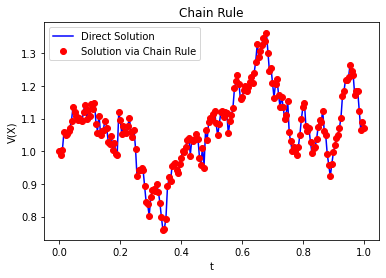

In [26]:
x_values = np.arange(0, T + Dt, Dt)


sqrt_X0_Xem1 = np.sqrt([X0] + list(np.abs(Xem1)))


plt.plot(x_values, sqrt_X0_Xem1, 'b-',label='Direct Solution')


plt.plot(x_values, [X0] + list(Xem2), 'ro', label='Solution via Chain Rule')
plt.xlabel('t')
plt.ylabel('V(X)')
plt.title('Chain Rule')
plt.legend()

# Show the plot
plt.show()